k =  1 --> Accuracy = 1.0000
k =  2 --> Accuracy = 1.0000
k =  3 --> Accuracy = 1.0000
k =  4 --> Accuracy = 1.0000
k =  5 --> Accuracy = 1.0000
k =  6 --> Accuracy = 1.0000
k =  7 --> Accuracy = 1.0000
k =  8 --> Accuracy = 1.0000
k =  9 --> Accuracy = 1.0000
k = 10 --> Accuracy = 1.0000
k = 11 --> Accuracy = 1.0000
k = 12 --> Accuracy = 1.0000
k = 13 --> Accuracy = 1.0000
k = 14 --> Accuracy = 1.0000
k = 15 --> Accuracy = 1.0000
k = 16 --> Accuracy = 1.0000
k = 17 --> Accuracy = 1.0000
k = 18 --> Accuracy = 1.0000
k = 19 --> Accuracy = 1.0000
k = 20 --> Accuracy = 1.0000

✅ Best k is 1 with accuracy = 1.0000


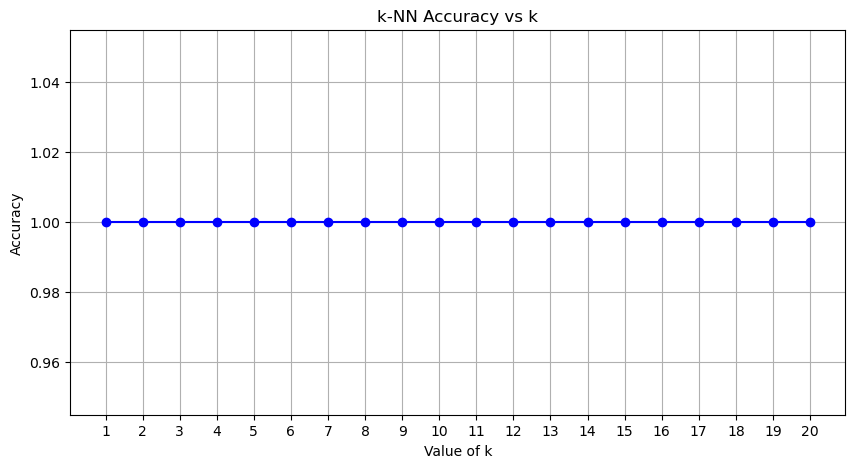


Final accuracy with best k (1) = 1.0000

Results on test set:

✔️ Correct:   Predicted = versicolor | Actual = versicolor
✔️ Correct:   Predicted = setosa     | Actual = setosa
✔️ Correct:   Predicted = virginica  | Actual = virginica
✔️ Correct:   Predicted = versicolor | Actual = versicolor
✔️ Correct:   Predicted = versicolor | Actual = versicolor
✔️ Correct:   Predicted = setosa     | Actual = setosa
✔️ Correct:   Predicted = versicolor | Actual = versicolor
✔️ Correct:   Predicted = virginica  | Actual = virginica
✔️ Correct:   Predicted = versicolor | Actual = versicolor
✔️ Correct:   Predicted = versicolor | Actual = versicolor
✔️ Correct:   Predicted = virginica  | Actual = virginica
✔️ Correct:   Predicted = setosa     | Actual = setosa
✔️ Correct:   Predicted = setosa     | Actual = setosa
✔️ Correct:   Predicted = setosa     | Actual = setosa
✔️ Correct:   Predicted = setosa     | Actual = setosa
✔️ Correct:   Predicted = versicolor | Actual = versicolor
✔️ Correct:   Predi

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def find_best_k(X_train, X_test, y_train, y_test, max_k=20):
    """Tries k from 1 to max_k and returns the best k based on test accuracy"""
    accuracies = []
    for k in range(1, max_k + 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
        print(f"k = {k:2d} --> Accuracy = {acc:.4f}")

    best_k = accuracies.index(max(accuracies)) + 1
    print(f"\n Best k is {best_k} with accuracy = {max(accuracies):.4f}")
    
    # Optional: Plot accuracy vs k
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_k + 1), accuracies, marker='o', color='blue')
    plt.title('k-NN Accuracy vs k')
    plt.xlabel('Value of k')
    plt.ylabel('Accuracy')
    plt.xticks(range(1, max_k + 1))
    plt.grid(True)
    plt.show()
    
    return best_k

# Find best k
best_k = find_best_k(X_train, X_test, y_train, y_test)

# Train classifier with best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Show accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nFinal accuracy with best k ({best_k}) = {accuracy:.4f}\n")

# Print predictions
print("Results on test set:\n")
for i in range(len(y_test)):
    actual = target_names[y_test[i]]
    predicted = target_names[y_pred[i]]
    if y_test[i] == y_pred[i]:
        print(f" Correct:   Predicted = {predicted:10s} | Actual = {actual}")
    else:
        print(f" Incorrect: Predicted = {predicted:10s} | Actual = {actual}")
